# Dữ liệu sau khi làm sạch

In [209]:
import pandas as pd

df = pd.read_csv('Before.csv')
df.index = df.index + 1
df.drop(columns=['sha', 'committer_date'], inplace=True)
df['author_date'] = df['author_date'].str.replace(r'\+00:00', '', regex=True)
df['Author_date'] = None
df['Author_time'] = None
df[['Author_date', 'Author_time']] = df['author_date'].str.split(' ', expand=True)
df.drop(columns=['author_date'], inplace=True)

df['Author_day'] = pd.to_datetime(df['Author_date']).dt.day_name()

df = df.rename(columns=lambda x: x.capitalize())

new_column_order = ["Author", "Author_email", "Author_day", "Author_date", "Author_time", "Files_changed", "Commit_message", "Committer"]

df = df.reindex(columns=new_column_order)

print(df)


              Author          Author_email Author_day Author_date Author_time  \
1        John Washam  john@readyprompt.com  Wednesday  2024-06-12    15:59:26   
2      Ronny Pacheco  ronny.pach@gmail.com  Wednesday  2024-06-12    05:34:47   
3        John Washam  john@readyprompt.com     Sunday  2024-06-09    21:21:37   
4     Vahan Minasian  vaanatwork@gmail.com     Sunday  2024-06-09    19:34:03   
5        John Washam  john@readyprompt.com     Sunday  2024-06-09    03:10:39   
...              ...                   ...        ...         ...         ...   
2488     John Washam  john@readyprompt.com     Monday  2016-06-06    17:11:16   
2489     John Washam  john@readyprompt.com     Monday  2016-06-06    16:13:56   
2490     John Washam  john@readyprompt.com     Monday  2016-06-06    02:46:49   
2491     John Washam  john@readyprompt.com     Monday  2016-06-06    02:41:26   
2492     John Washam  john@readyprompt.com     Monday  2016-06-06    02:34:12   

                  Files_cha

In [210]:
import pandas as pd

# Giả sử df đã được định nghĩa và chứa dữ liệu từ CSV

# Số lượng commit
commit_count = len(df)

# Số lượng tác giả duy nhất
author_count = df['Author'].nunique()

# Số lượng email duy nhất
unique_email_count = df['Author_email'].nunique()

# Số lượng email từ domain Gmail
gmail_count = df['Author_email'].str.contains('@gmail.com').sum()

# Đếm số lượng email rỗng hoặc không xác định
null_email_count = df['Author_email'].isnull().sum()

# Kiểm tra có bao nhiêu tác giả sử dụng nhiều hơn một email
multiple_emails_per_author = df.groupby('Author')['Author_email'].nunique()
authors_with_multiple_emails = multiple_emails_per_author[multiple_emails_per_author > 1].count()

# Hiển thị các số liệu thống kê
print(f"Số lượng commit: {commit_count}")
print(f"Số lượng tác giả duy nhất: {author_count}")
print(f"Số lượng email duy nhất: {unique_email_count}")
print(f"Số lượng email từ domain Gmail: {gmail_count}")
print(f"Số lượng email rỗng hoặc không xác định: {null_email_count}")
print(f"Số lượng tác giả sử dụng nhiều hơn một email: {authors_with_multiple_emails}")



Số lượng commit: 2492
Số lượng tác giả duy nhất: 366
Số lượng email duy nhất: 364
Số lượng email từ domain Gmail: 1117
Số lượng email rỗng hoặc không xác định: 1
Số lượng tác giả sử dụng nhiều hơn một email: 14


# Phân tích số lượng commits

### Số lượng commits theo các thứ trong tuần

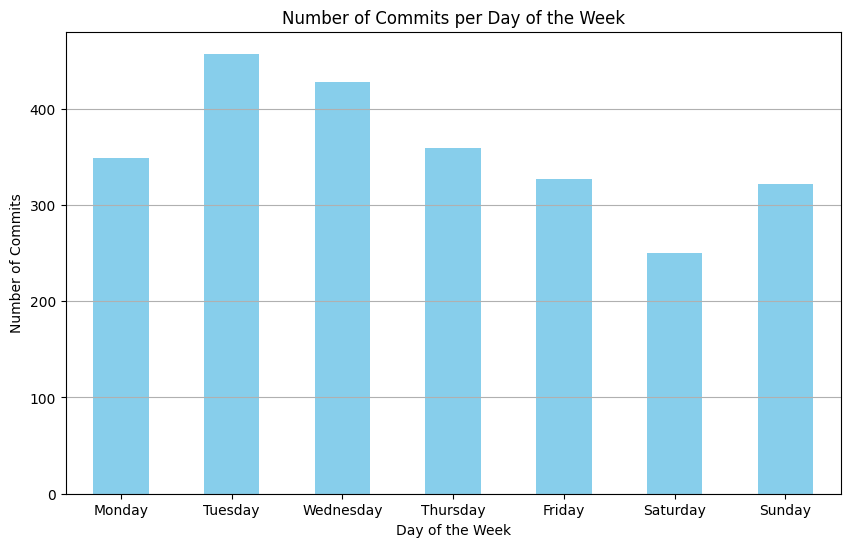

In [211]:
import pandas as pd
import matplotlib.pyplot as plt


df['Author_day'] = pd.Categorical(df['Author_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Get the value counts and sort by the specified order
commit_counts = df['Author_day'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
commit_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Commits per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Commits')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Số lượng commits theo giờ trong ngày

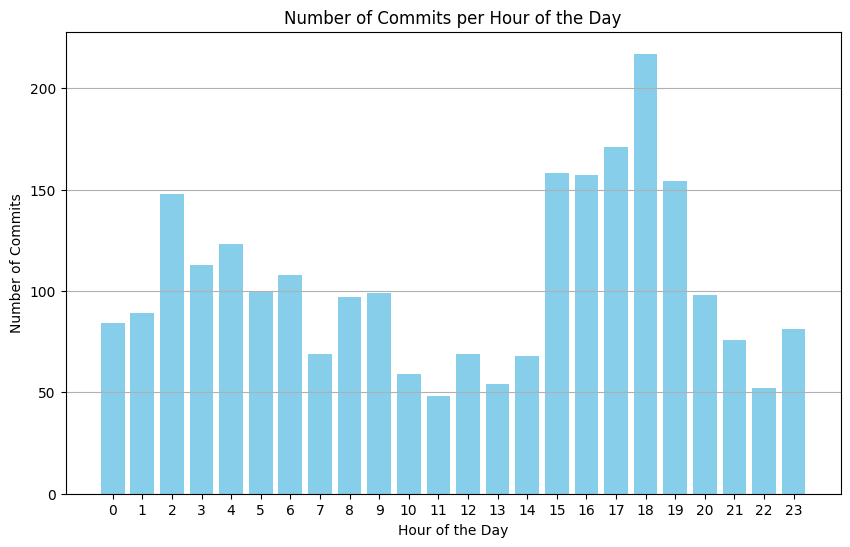

In [212]:

df['hour_of_day'] = df['Author_time'].str.split(':').str[0].astype(int)
commits_per_hour = df['hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(commits_per_hour.index, commits_per_hour.values, color='skyblue')
plt.title('Number of Commits per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Commits')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


### Số lượng commits mỗi ngày, mỗi tuần , mỗi tháng và mỗi năm :

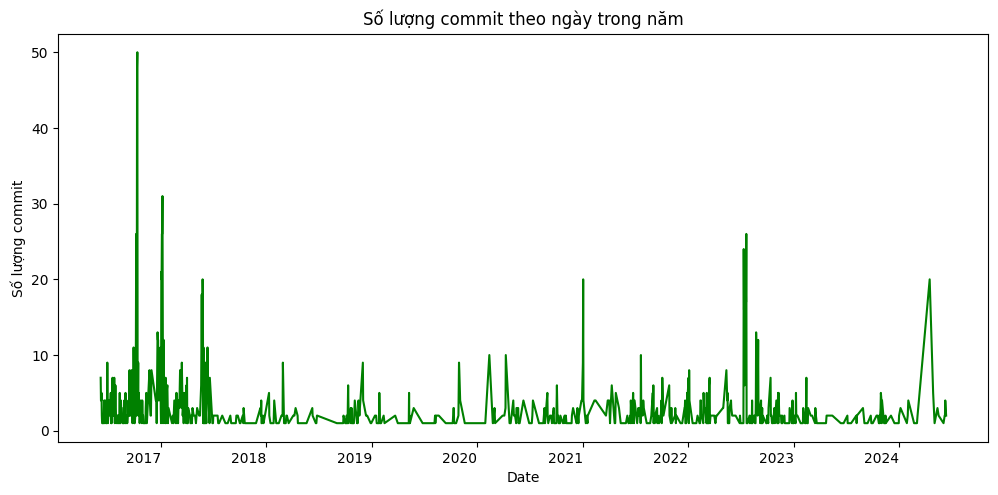

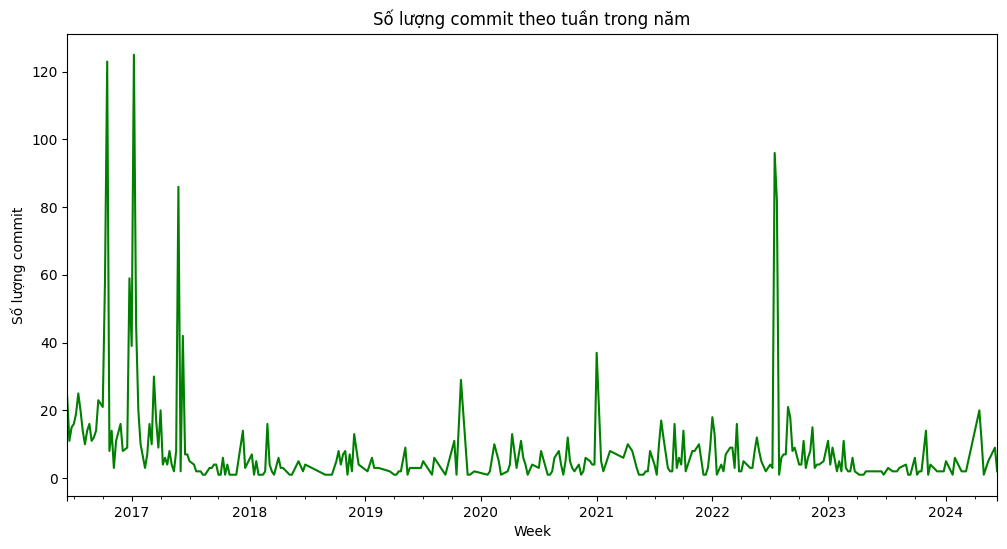

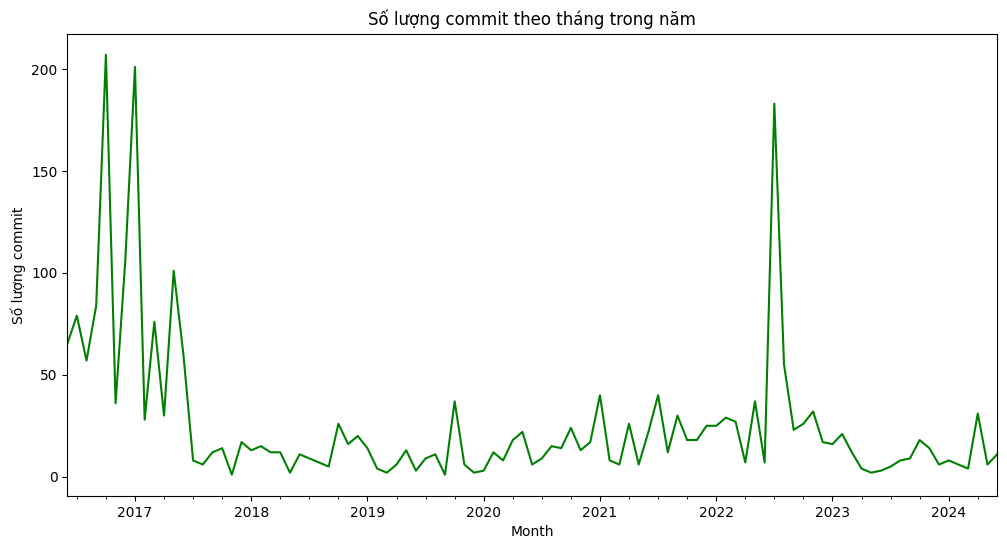

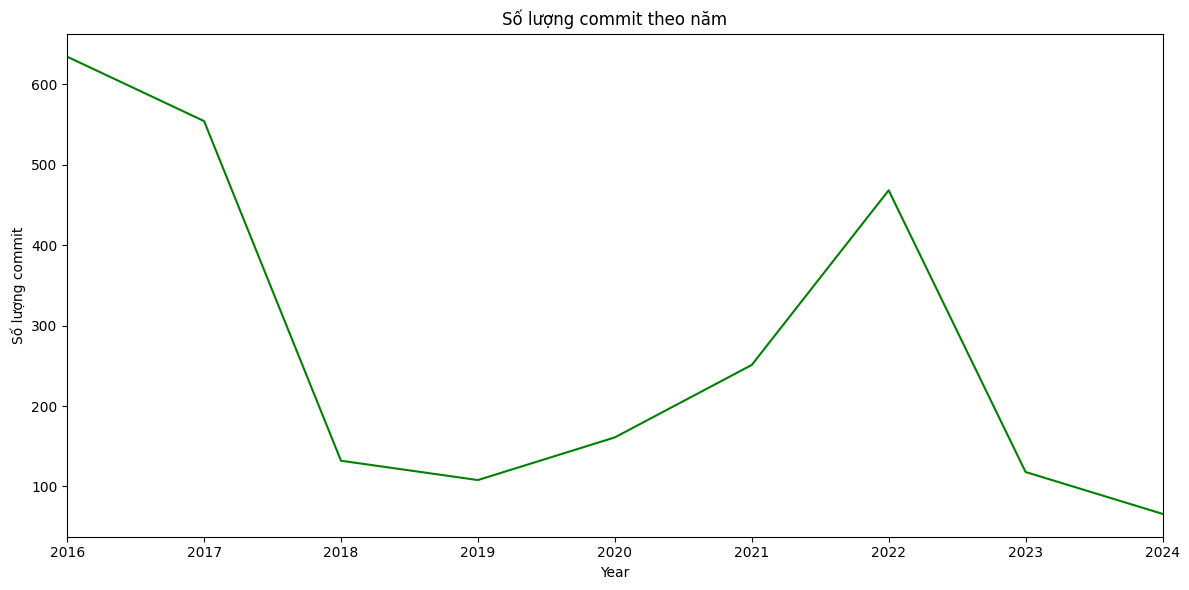

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

df['Author_date'] = pd.to_datetime(df['Author_date'])
commit_counts_by_day = df['Author_date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
commit_counts_by_day.plot(kind='line', color='green')
plt.title('Số lượng commit theo ngày trong năm')
plt.xlabel('Date')
plt.ylabel('Số lượng commit')
plt.xticks(rotation=0)

df['week'] = df['Author_date'].dt.to_period('W')
commit_counts_by_week = df['week'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
commit_counts_by_week.plot(kind='line', color='green')
plt.title('Số lượng commit theo tuần trong năm')
plt.xlabel('Week')
plt.ylabel('Số lượng commit')
plt.xticks(rotation=0)

df['month'] = df['Author_date'].dt.to_period('M')
commit_counts_by_month = df['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
commit_counts_by_month.plot(kind='line', color='green')
plt.title('Số lượng commit theo tháng trong năm')
plt.xlabel('Month')
plt.ylabel('Số lượng commit')
plt.xticks(rotation=0)

df['month'] = df['Author_date'].dt.to_period('Y')
commit_counts_by_month = df['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
commit_counts_by_month.plot(kind='line', color='green')
plt.title('Số lượng commit theo năm')
plt.xlabel('Year')
plt.ylabel('Số lượng commit')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



In [214]:
df = pd.read_csv('Before.csv')
commit_counts_by_author = df['author'].value_counts()
commit_percentages = (commit_counts_by_author / commit_counts_by_author.sum()) * 100

commit_summary = pd.DataFrame({
    'Committer': commit_counts_by_author.index,
    'Number of commits': commit_counts_by_author.values,
    'Percentage': commit_percentages.values
})

commit_summary['Percentage'] = commit_summary['Percentage'].round(2)
commit_summary.index = commit_summary.index + 1

print(commit_summary.head(10))


         Committer  Number of commits  Percentage
1      John Washam                984       39.49
2     Anri Lombard                165        6.62
3      Marlon Aviz                 76        3.05
4        YoSaucedo                 75        3.01
5          aleen42                 53        2.13
6       Keonil Kim                 41        1.65
7      Le Tien Tai                 34        1.36
8       hexatester                 27        1.08
9     Dimo Dimchev                 26        1.04
10  Marco Marrelli                 23        0.92


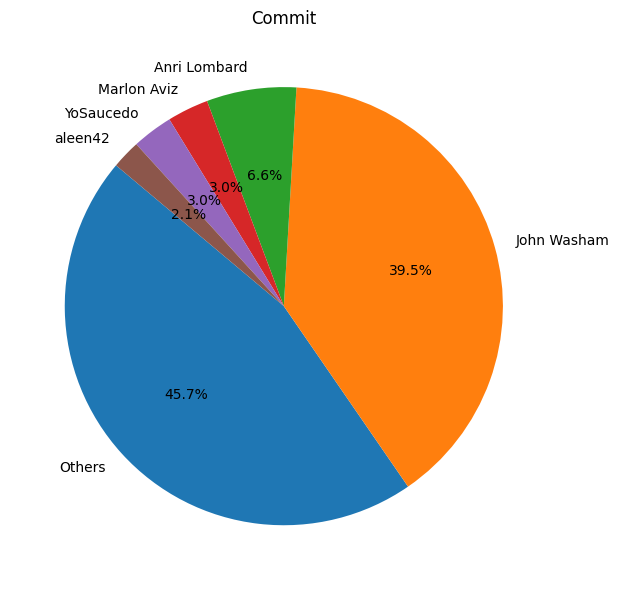

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

commit_counts_by_author = df['author'].value_counts()

top_contributors = commit_counts_by_author.head(5)

others_count = commit_counts_by_author[5:].sum()

others_series = pd.Series({'Others': others_count})
top_contributors_with_others = pd.concat([ others_series, top_contributors])

plt.figure(figsize=(10, 6))
top_contributors_with_others.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Commit')
plt.tight_layout()
plt.show()


### Top 5 đuôi email phổ biến nhất

Top 5 đuôi email phổ biến nhất:
Type_email
gmail.com                   201
users.noreply.github.com     86
qq.com                        5
yahoo.com                     4
outlook.com                   2
Name: author_email, dtype: int64


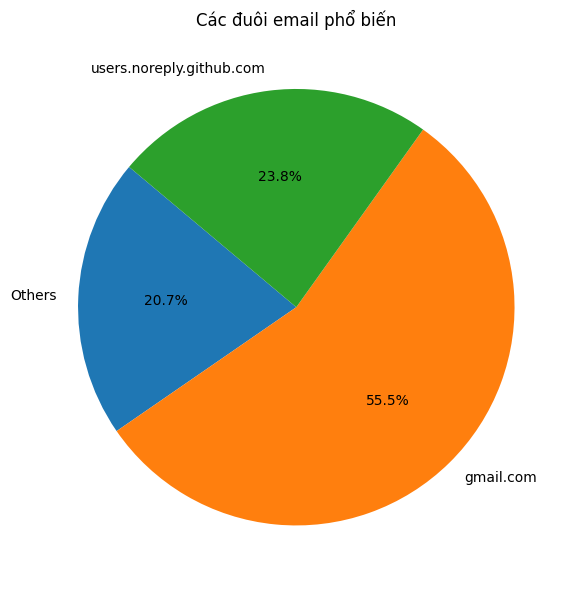

In [216]:
import pandas as pd
df['Type_email'] = df['author_email'].str.extract(r'@([\w\.-]+\.\w+)')
email_types_unique_counts = df.groupby('Type_email')['author_email'].nunique().sort_values(ascending=False)
top_email = email_types_unique_counts.head(5)
print("Top 5 đuôi email phổ biến nhất:")
print(top_email)

others_email = email_types_unique_counts[2:].sum()

others_series = pd.Series({'Others': others_email})
top_email_with_others = pd.concat([ others_series, email_types_unique_counts.head(2)])

plt.figure(figsize=(10, 6))
top_email_with_others.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Các đuôi email phổ biến')
plt.tight_layout()
plt.show()



### Top 10 emails đóng góp nhiều nhất

In [217]:
top_10_emails = df['author_email'].value_counts().head(10)
top_10_authors = df.groupby('author_email')['author'].first()
top_10 = pd.DataFrame({'author_email': top_10_emails.index, 'Commits':  top_10_emails.values})
top_10['Author_name'] = top_10['author_email'].map(top_10_authors)

print(top_10)


               author_email  Commits      Author_name
0      john@readyprompt.com      873      John Washam
1  anri.m.lombard@gmail.com      163     Anri Lombard
2     aviz.marlon@gmail.com       76      Marlon Aviz
3          washam@gmail.com       75      John Washam
4         yaseuso@gmail.com       75        YoSaucedo
5        aleen42@vip.qq.com       53          aleen42
6       strollkim@gmail.com       41       Keonil Kim
7      helpdesk@zkorean.com       30      John Washam
8   john.ilyushin@gmail.com       28  Eugene Ilyushin
9   revolusi147id@gmail.com       27       hexatester


### Những author dùng nhiều email để commit

In [218]:
authors_with_multiple_emails = df.groupby('author')['author_email'].nunique().sort_values(ascending=False)
authors_with_multiple_emails = authors_with_multiple_emails[authors_with_multiple_emails > 1]
authors_with_multiple_emails = authors_with_multiple_emails.reset_index() 
authors_with_multiple_emails.index = authors_with_multiple_emails.index + 1
print("Danh sách author dùng nhiều email để commit:")
print(authors_with_multiple_emails)

Danh sách author dùng nhiều email để commit:
               author  author_email
1         John Washam             4
2         Le Tien Tai             4
3             KiwiB0y             2
4         Vortana Say             2
5         Dennis Jung             2
6       Ivan Reznikov             2
7     Eugene Ilyushin             2
8            kamegoro             2
9   Sourabh Mhaisekar             2
10      Gul Jamal Zim             2
11             YangQi             2
12       Mikhail Usov             2
13       Anri Lombard             2
14         Joona Yoon             2


### Các file chỉnh sửa nhiều nhất


Số lần chỉnh sửa của mỗi file:
                            file_path  edit_count
1                           README.md         852
2           translations/README-af.md         161
3           translations/README-ko.md         101
4         translations/README-ptbr.md          97
5           translations/README-ru.md          91
6                        README-cn.md          89
7   programming-language-resources.md          69
8           translations/README-bg.md          57
9           translations/README-id.md          51
10          translations/README-cn.md          51
11                           plan.txt          50
12                       README-vn.md          47
13          translations/README-bn.md          44
14          translations/README-es.md          40
15          translations/es/README.md          39
16                       README-es.md          36
17          translations/README-ja.md          35
18          translations/README-fr.md          26
19          transla

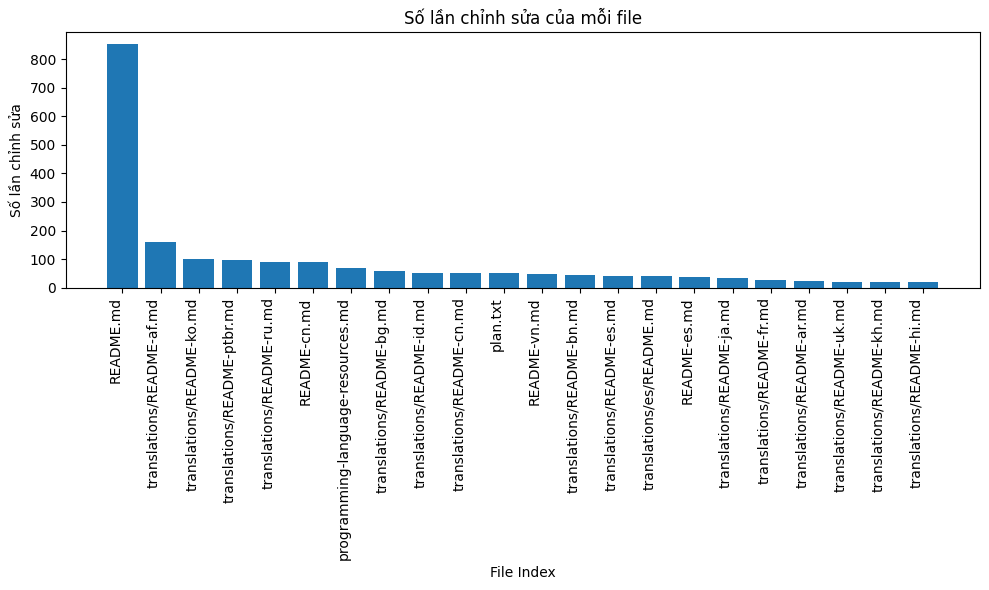

In [219]:
file_changed = df['files_changed'].value_counts()
file_changed = file_changed[file_changed > 20]  
file_changed = file_changed.reset_index()
file_changed.columns = ['file_path', 'edit_count']
file_changed.index = file_changed.index + 1 

print("Số lần chỉnh sửa của mỗi file:")
print(file_changed)

plt.figure(figsize=(10, 6))
plt.bar(file_changed.index, file_changed['edit_count'])
plt.xlabel('File Index')
plt.ylabel('Số lần chỉnh sửa')
plt.title('Số lần chỉnh sửa của mỗi file')
plt.xticks(file_changed.index, file_changed['file_path'], rotation=90, ha='right')
plt.tight_layout()
plt.show()


### Top 10 các từ xuất hiện nhiều nhất trong commits của repo

           Word  Frequency
1         merge        607
2          from        566
3          pull        516
4       request        515
5            to        417
6   translation        392
7        update        344
8        readme        316
9         added        299
10          the        282


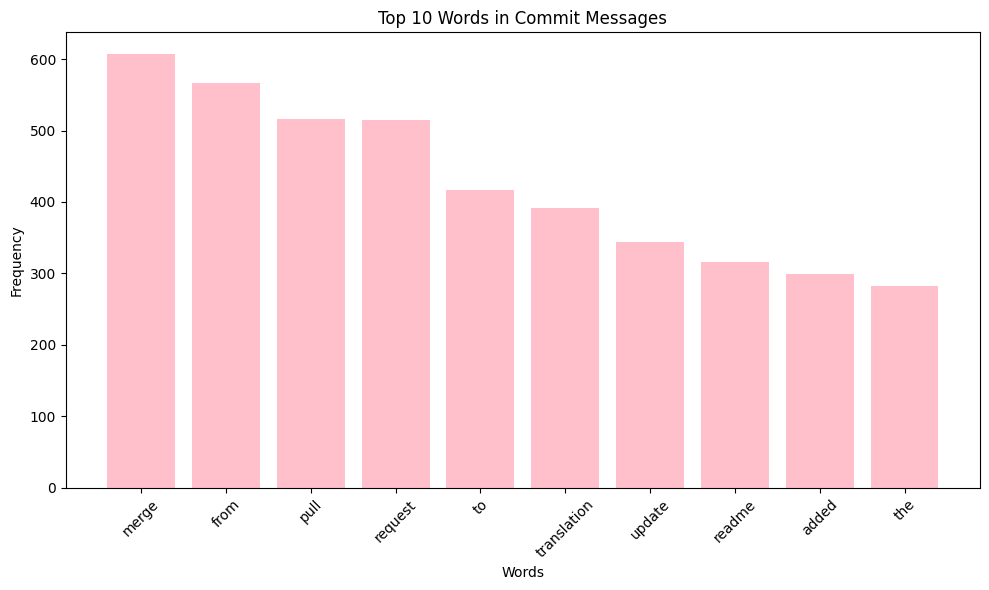

In [220]:
import pandas as pd
import re
from collections import Counter

all_messages = ' '.join(df['commit_message'])

words = re.findall(r'\b\w+\b', all_messages.lower()) 
word_counts = Counter(words)

top_words = word_counts.most_common(10)
df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
df_top_words.index = df_top_words.index + 1
print(df_top_words)

plt.figure(figsize=(10, 6))
plt.bar(df_top_words['Word'], df_top_words['Frequency'], color='pink')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Commit Messages')
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


### Sự tăng trưởng của Repo

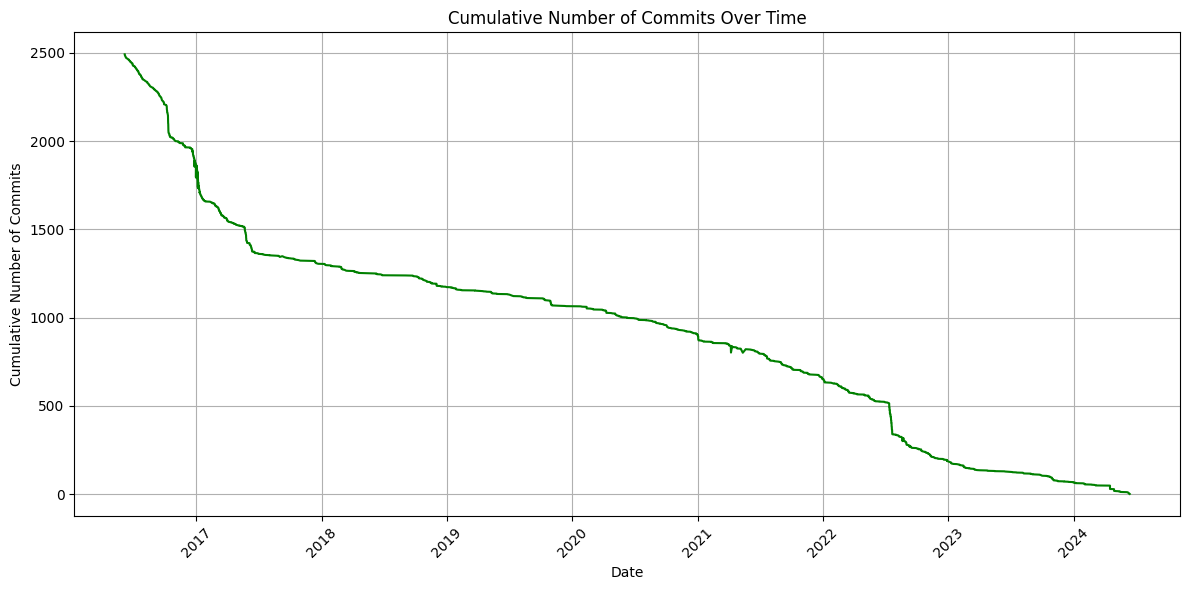

In [232]:
df['author_date'] = pd.to_datetime(df['author_date'])

# Extract year and month from 'Author_date'
df['year'] = df['Author_date'].dt.year
df['month'] = df['Author_date'].dt.month

# Calculate cumulative sum of commits per month
df['cumulative_commits'] = df.groupby(['year', 'month']).cumcount() + 1

# Plotting
plt.figure(figsize=(12, 6))

# Loop through each year to plot cumulative commits by month
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    cumulative_commits = year_data.groupby('month')['cumulative_commits'].max().cumsum()
    plt.plot(cumulative_commits.index, cumulative_commits.values, marker='o', label=f'Year {year}')

# Customize the plot
plt.title('Cumulative Number of Commits by Month')
plt.xlabel('Month')
plt.ylabel('Cumulative Number of Commits')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()